# Group 1 Final Project Predict Student Dropout

## Set up mySQL Connection 

Set up where to get information for the database from

"*" is a wildcard expansion to say any beginning but ending with specific text

Setup for finding the password file. 
Glob module allows for wildcard ("*" asterisk) to find any file that ends with password. This is for ease of transferance to group mates. 

In [1]:
import glob

myvars = {}
passfile = (glob.glob('*password'))
print(passfile)

with open(passfile[0]) as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

['trivarna-mysql-password']


In [2]:
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

Set up db connection (Must give the name of the sahred database)

In [3]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db= 'I501_Fall2023_Sec22490_group01_db')
cursor = conn.cursor()

Check to be sure proper  data fetched 

In [4]:
cursor.execute('select * FROM academic_dropout')
rows = cursor.fetchall()


In [5]:
print(len(rows))

4425


In [6]:
cursor.execute('select * FROM student_mental_health')

102

In [7]:
import pandas as pd
dropoutdf = pd.read_sql('select * FROM academic_dropout', conn)

/tmp/ipykernel_4030830/1979179891.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dropoutdf = pd.read_sql('select * FROM academic_dropout', conn)


In [8]:
dropoutdf

,marital_status,application_mode,application_order,course,time_of_day,previous_qual,prev_grade,nationality,mother_qual,father_qual,...,sem1_noeval,sem2_credit,sem2_enrolled,sem2_eval,sem2_approv,sem2_grade,sem2_noeval,unemployment,inflation,target
0,Marital status,Application mode,Application order,Course,Day or night attendancece\t,Previous qualification,Previous qualification (grade),Nationality,Mother qualification,Father qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,Target
1,1,17,5,171,1,1,122,1,19,12,...,0,0,0,0,0,0,0,10.8,1.4,Dropout
2,1,15,1,9254,1,1,160,1,1,3,...,0,0,6,6,6,13.66666667,0,13.9,-0.3,Graduate
3,1,1,5,9070,1,1,122,1,37,37,...,0,0,6,0,0,0,0,10.8,1.4,Dropout
4,1,17,2,9773,1,1,122,1,38,37,...,0,0,6,10,5,12.4,0,9.4,-0.8,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,1,1,6,9773,1,1,125,1,1,1,...,0,0,6,8,5,12.66666667,0,15.5,2.8,Graduate
4421,1,1,2,9773,1,1,120,105,1,1,...,0,0,6,6,2,11,0,11.1,0.6,Dropout
4422,1,1,1,9500,1,1,154,1,37,37,...,0,0,8,9,1,13.5,0,13.9,-0.3,Dropout
4423,1,1,1,9147,1,1,180,1,37,37,...,0,0,5,6,5,12,0,9.4,-0.8,Graduate


In [9]:
#adding note here

In [10]:
dropoutdf = dropoutdf.drop([0])

dropoutdf

,marital_status,application_mode,application_order,course,time_of_day,previous_qual,prev_grade,nationality,mother_qual,father_qual,...,sem1_noeval,sem2_credit,sem2_enrolled,sem2_eval,sem2_approv,sem2_grade,sem2_noeval,unemployment,inflation,target
1,1,17,5,171,1,1,122,1,19,12,...,0,0,0,0,0,0,0,10.8,1.4,Dropout
2,1,15,1,9254,1,1,160,1,1,3,...,0,0,6,6,6,13.66666667,0,13.9,-0.3,Graduate
3,1,1,5,9070,1,1,122,1,37,37,...,0,0,6,0,0,0,0,10.8,1.4,Dropout
4,1,17,2,9773,1,1,122,1,38,37,...,0,0,6,10,5,12.4,0,9.4,-0.8,Graduate
5,2,39,1,8014,0,1,100,1,37,38,...,0,0,6,6,6,13,0,13.9,-0.3,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,1,1,6,9773,1,1,125,1,1,1,...,0,0,6,8,5,12.66666667,0,15.5,2.8,Graduate
4421,1,1,2,9773,1,1,120,105,1,1,...,0,0,6,6,2,11,0,11.1,0.6,Dropout
4422,1,1,1,9500,1,1,154,1,37,37,...,0,0,8,9,1,13.5,0,13.9,-0.3,Dropout
4423,1,1,1,9147,1,1,180,1,37,37,...,0,0,5,6,5,12,0,9.4,-0.8,Graduate


##Begin Model Building 

split dependent and independent variables 

Check for multicolineairty orf independent variables
using correlation matrix 
matplotlib.pyplot and seaborn modules allow for visualization 

installing seaborn module

In [11]:
#give details on data description (df. describe and df.dtypes)

In [12]:

!python3 -m pip install seaborn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [13]:
variables = []
for col in dropoutdf.columns: 
    variables.append(col)

ind_var =  variables[0:35]
dep_var = variables[35]

x = dropoutdf[ind_var].astype(float)
y = dropoutdf[dep_var]
print(x)
print(y)

      marital_status  application_mode  application_order  course  \
1                1.0              17.0                5.0   171.0   
2                1.0              15.0                1.0  9254.0   
3                1.0               1.0                5.0  9070.0   
4                1.0              17.0                2.0  9773.0   
5                2.0              39.0                1.0  8014.0   
...              ...               ...                ...     ...   
4420             1.0               1.0                6.0  9773.0   
4421             1.0               1.0                2.0  9773.0   
4422             1.0               1.0                1.0  9500.0   
4423             1.0               1.0                1.0  9147.0   
4424             1.0              10.0                1.0  9773.0   

      time_of_day  previous_qual  prev_grade  nationality  mother_qual  \
1             1.0            1.0       122.0          1.0         19.0   
2             1.0      

In [14]:
df_independent_features = dropoutdf[ind_var].astype(float)

                   marital_status  application_mode  application_order  \
marital_status           1.000000          0.264006          -0.125854   
application_mode         0.264006          1.000000          -0.286357   
application_order       -0.125854         -0.286357           1.000000   
course                   0.046365          0.065385           0.059507   
time_of_day             -0.274939         -0.304092           0.158657   
previous_qual            0.062529          0.422411          -0.184315   
prev_grade              -0.022406         -0.039020          -0.064484   
nationality             -0.008843         -0.000661          -0.022416   
mother_qual              0.193163          0.118974          -0.064956   
father_qual              0.130353          0.083276          -0.050288   
mother_occ               0.034994          0.051600          -0.039039   
father_occ               0.031609          0.036707          -0.030014   
admission_grade         -0.004771     

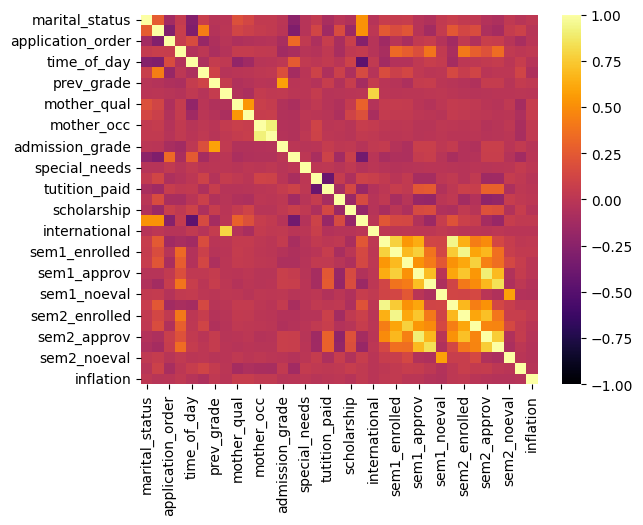

In [15]:
import numpy as np
import matplotlib.pyplot as mp 
import seaborn as sb

matrix = df_independent_features.corr()
print(matrix)

dataplot = sb.heatmap(matrix, cmap ='inferno', vmin = -1, vmax= 1)

split data into test and train

In [16]:
from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size  = 0.20)

In [17]:
from sklearn.linear_model import LogisticRegression

simplemod = LogisticRegression()
simplemod.fit(xtrain, ytrain)

/home/students/trivarna/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#dataframe create code give val abv 0.5 sub set of numbers course by course 

In [19]:
matrix

,marital_status,application_mode,application_order,course,time_of_day,previous_qual,prev_grade,nationality,mother_qual,father_qual,...,sem1_grade,sem1_noeval,sem2_credit,sem2_enrolled,sem2_eval,sem2_approv,sem2_grade,sem2_noeval,unemployment,inflation
marital_status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761
application_mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375
application_order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133
course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710
time_of_day,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043
previous_qual,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736
prev_grade,-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710
nationality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922
mother_qual,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,-0.036157,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441
father_qual,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.007732,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633


In [20]:
filtered_matrix = matrix[(matrix > 0.5) & (matrix < 0.8)]

In [21]:
filtered_matrix

,marital_status,application_mode,application_order,course,time_of_day,previous_qual,prev_grade,nationality,mother_qual,father_qual,...,sem1_grade,sem1_noeval,sem2_credit,sem2_enrolled,sem2_eval,sem2_approv,sem2_grade,sem2_noeval,unemployment,inflation
marital_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
application_mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
application_order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_of_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_qual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prev_grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mother_qual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
father_qual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53514,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def get_correlated_column_list(dataFrame):

    row_list = dataFrame.columns
    row, col = dataFrame.shape
    result = {}
    for i in range(row):
        data_row = dataFrame.iloc[i, :]
        filter = ~data_row.isnull()
        correlated_columns = data_row[filter == True].index.values.tolist()
        result[row_list[i]] = correlated_columns

    return result

In [23]:
correlated_dict = get_correlated_column_list(filtered_matrix)

In [24]:
correlated_dict

{'marital_status': ['age'],
 'application_mode': ['age'],
 'application_order': [],
 'course': [],
 'time_of_day': [],
 'previous_qual': [],
 'prev_grade': ['admission_grade'],
 'nationality': ['international'],
 'mother_qual': ['father_qual'],
 'father_qual': ['mother_qual'],
 'mother_occ': [],
 'father_occ': [],
 'admission_grade': ['prev_grade'],
 'displaced': [],
 'special_needs': [],
 'debtor': [],
 'tutition_paid': [],
 'gender': [],
 'scholarship': [],
 'age': ['marital_status', 'application_mode'],
 'international': ['nationality'],
 'sem1_credit': ['sem1_enrolled', 'sem1_eval', 'sem1_approv', 'sem2_enrolled'],
 'sem1_enrolled': ['sem1_credit',
  'sem1_eval',
  'sem1_approv',
  'sem2_credit',
  'sem2_eval',
  'sem2_approv'],
 'sem1_eval': ['sem1_credit',
  'sem1_enrolled',
  'sem1_approv',
  'sem2_credit',
  'sem2_enrolled',
  'sem2_eval'],
 'sem1_approv': ['sem1_credit',
  'sem1_enrolled',
  'sem1_eval',
  'sem1_grade',
  'sem2_credit',
  'sem2_enrolled',
  'sem2_eval',
  'sem

In [25]:
dropoutdf.target

1        Dropout
2       Graduate
3        Dropout
4       Graduate
5       Graduate
          ...   
4420    Graduate
4421     Dropout
4422     Dropout
4423    Graduate
4424    Graduate
Name: target, Length: 4424, dtype: object

In [26]:
# Converting multi-class categorical variables to one-hot encodings
df_target = pd.get_dummies(dropoutdf.target, dtype=float)

In [27]:
df_target.transpose()

,1,2,3,4,5,6,7,8,9,10,...,4415,4416,4417,4418,4419,4420,4421,4422,4423,4424
Dropout,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Enrolled,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Graduate,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [28]:
def get_correlation_with_target(df_features, df_target):

    feature_colums = df_features.columns
    target_columns = df_target.columns

    result = {}

    for target_col in target_columns:
        correlation_lst = []
        for feature_col in feature_colums:
            corr = df_target[target_col].corr(df_features[feature_col])
            correlation_lst.append(corr)
        result[target_col] = correlation_lst
    result_df = pd.DataFrame(result, index=feature_colums)
    return result_df
        

In [29]:
df_features_target_correlation = get_correlation_with_target(df_independent_features, df_target)

In [30]:
df_features_target_correlation

,Dropout,Enrolled,Graduate
marital_status,0.093712,-0.020214,-0.072001
application_mode,0.198458,0.030247,-0.208550
application_order,-0.070485,-0.036280,0.093670
course,-0.033676,0.002758,0.029333
time_of_day,-0.080499,0.022073,0.058235
previous_qual,0.049379,0.009529,-0.053427
prev_grade,-0.078208,-0.049826,0.111278
nationality,0.008346,0.013946,-0.018497
mother_qual,0.064958,-0.058149,-0.016033
father_qual,0.018295,-0.041297,0.014611


In [31]:
def get_max_correlation_position(col_list, target_correlation):

    max_correlation_col = ""
    max_correlation = float("-inf")

    for col in col_list:
        col_correlation = target_correlation.loc[col, "Dropout"]
        if col_correlation > max_correlation:
            max_correlation = col_correlation
            max_correlation_col = col

    return max_correlation_col

In [32]:
def select_features(correlation_dict, target_correlation):

    selected_features = set()

    for key in correlation_dict.keys():
        correlated_cols = correlated_dict[key]

        if len(correlated_cols) == 0:
            continue

        max_correlated_col = get_max_correlation_position(correlated_cols, target_correlation)
        final_col = get_max_correlation_position([key, max_correlated_col], target_correlation)

        selected_features.add(final_col)

    return list(selected_features)

In [33]:
selected_columns = select_features(correlated_dict, df_features_target_correlation)

In [34]:
selected_columns

['sem2_credit',
 'age',
 'nationality',
 'prev_grade',
 'sem1_approv',
 'sem1_eval',
 'mother_qual',
 'sem1_credit',
 'sem2_noeval']

In [35]:
select_col_corr_matrix = get_correlation_with_target(df_independent_features[selected_columns], df_target)

In [36]:
select_col_corr_matrix

,Dropout,Enrolled,Graduate
sem2_credit,-0.033038,-0.044585,0.065073
age,0.254215,-0.055241,-0.195009
nationality,0.008346,0.013946,-0.018497
prev_grade,-0.078208,-0.049826,0.111278
sem1_approv,-0.479112,-0.058646,0.492443
sem1_eval,-0.090125,0.116654,-0.005366
mother_qual,0.064958,-0.058149,-0.016033
sem1_credit,-0.029308,-0.040113,0.058157
sem2_noeval,0.079901,0.023171,-0.092402


             sem2_credit       age  nationality  prev_grade  sem1_approv  \
sem2_credit     1.000000  0.207561    -0.007278   -0.018489     0.607661   
age             0.207561  1.000000    -0.003647   -0.111377    -0.053405   
nationality    -0.007278 -0.003647     1.000000    0.054088    -0.002268   
prev_grade     -0.018489 -0.111377     0.054088    1.000000     0.048410   
sem1_approv     0.607661 -0.053405    -0.002268    0.048410     1.000000   
sem1_eval       0.522187  0.139911    -0.007763   -0.070702     0.522396   
mother_qual     0.042771  0.294614    -0.049946   -0.060670    -0.011026   
sem1_credit     0.944811  0.226837    -0.000370   -0.008872     0.628394   
sem2_noeval     0.070148  0.061654    -0.014041   -0.019015    -0.053983   

             sem1_eval  mother_qual  sem1_credit  sem2_noeval  
sem2_credit   0.522187     0.042771     0.944811     0.070148  
age           0.139911     0.294614     0.226837     0.061654  
nationality  -0.007763    -0.049946    -0.00037

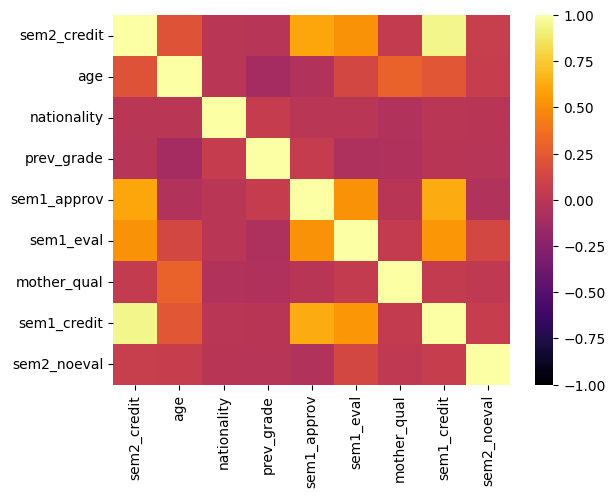

In [37]:
selected_col_matrix = df_independent_features[selected_columns].corr()
print(selected_col_matrix)

dataplot = sb.heatmap(selected_col_matrix, cmap ='inferno', vmin = -1, vmax= 1)

Determining Proportion of each class in the dataset

In [38]:
import pandas as pd

#Put the target column in the 'target column' variable so we can re-use this variable throughout the code.
target_column = 'target'

# Replace "graduate" and "enrolled" with the "non_dropout" label
dropoutdf[target_column] = dropoutdf[target_column].replace({'Graduate': 'non_dropout', 'Enrolled': 'non_dropout'})

dropoutdf[target_column] = dropoutdf[target_column].apply(lambda x: 1 if x in ['Dropout'] else 0)


# Calculate the proportion of 0s and 1s in the target column
target_proportions = dropoutdf[target_column].value_counts(normalize=True)

# Display the result
print(target_proportions)
# The result shows that currently 67.87% of the data is "non-dropout", 32.12% of the data is dropout. 
# We will address this issue for a more even distribution.


target
0    0.678797
1    0.321203
Name: proportion, dtype: float64


SMOTE Test and Logistic Regression

In [39]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [40]:
# Use only selected features based on correlation analysis
selected_features = ['sem1_credit', 'sem2_credit', 'sem1_approv', 'sem1_eval', 'prev_grade', 'mother_qual', 'sem2_noeval']

# Create the feature matrix X and target variable y
X = dropoutdf[selected_features].values  # X is a NumPy array - independent features
y = dropoutdf[target_column].values  # y is a NumPy array - dependent feature

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the proportions for the minority and majority classes before SMOTE
print("Before SMOTE:")
print("Class distribution in the original training set:")
print(pd.Series(y_train).value_counts(normalize=True))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the proportions for the minority and majority classes after SMOTE
print("\nAfter SMOTE:")
print("Class distribution in the resampled training set:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

# Create and train the logistic regression model on the resampled data
logreg_model = LogisticRegression(max_iter=4000)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("\nEvaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print(logreg_model.score(X_train_resampled, y_train_resampled))

print(logreg_model.score(X_test, y_test))

Before SMOTE:
Class distribution in the original training set:
0    0.687765
1    0.312235
Name: proportion, dtype: float64

After SMOTE:
Class distribution in the resampled training set:
1    0.5
0    0.5
Name: proportion, dtype: float64

Evaluation Results:
Accuracy: 0.784180790960452
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       569
           1       0.69      0.72      0.70       316

    accuracy                           0.78       885
   macro avg       0.76      0.77      0.77       885
weighted avg       0.79      0.78      0.79       885

0.7951930977814298
0.784180790960452


Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = logreg_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract True Positives, True Negatives, False Positives, False Negatives from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print confusion matrix, sensitivity, and specificity
print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

# Print classification report for additional metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
[[467 102]
 [ 89 227]]

Sensitivity (Recall): 0.7183544303797469
Specificity: 0.820738137082601

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       569
           1       0.69      0.72      0.70       316

    accuracy                           0.78       885
   macro avg       0.76      0.77      0.77       885
weighted avg       0.79      0.78      0.79       885



In [42]:
pip install -U imbalanced-learn   

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Plotting the confusion matrix

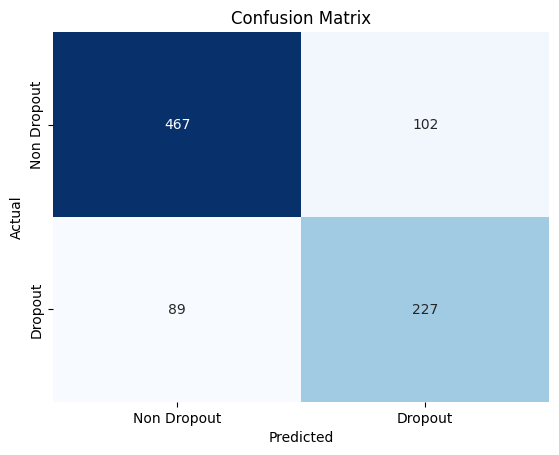


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       569
           1       0.69      0.72      0.70       316

    accuracy                           0.78       885
   macro avg       0.76      0.77      0.77       885
weighted avg       0.79      0.78      0.79       885

0.7951930977814298
0.784180790960452
Confusion Matrix:
 [[467 102]
 [ 89 227]]


In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions from our logistic regression model
y_pred = logreg_model.predict(X_test)

# Calculate confusion
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn as an additional step to create the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Non Dropout", "Dropout"], yticklabels=["Non Dropout", "Dropout"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print(logreg_model.score(X_train_resampled, y_train_resampled))

print(logreg_model.score(X_test, y_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Decision Tree Model

Class distribution in the resampled training set:
1    0.5
0    0.5
Name: proportion, dtype: float64
Decision Tree Performance:
Accuracy: 0.7322033898305085
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       569
           1       0.64      0.56      0.60       316

    accuracy                           0.73       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.73      0.73      0.73       885

Confusion Matrix:
 [[471  98]
 [139 177]]


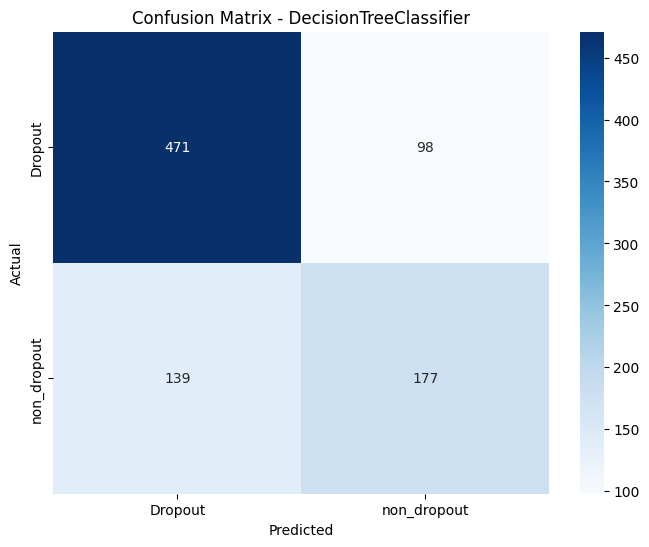

0.7951930977814298
0.784180790960452


In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Use only selected features based on correlation analysis
selected_features = ['sem1_credit', 'sem2_credit', 'sem1_approv', 'sem1_eval', 'prev_grade', 'mother_qual', 'sem2_noeval']

# Create the feature matrix X and target variable y
X = dropoutdf[selected_features].values  # X is a NumPy array - independent features
y = dropoutdf[target_column].values  # y is a NumPy array - dependent feature

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution in the resampled training set:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))


# Create and train the decision tree model on the resampled data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the decision tree
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

# Decision Tree Confusion Matrix
# Function to plot confusion matrix using seaborn
def plot_confusion_matrix_heatmap(model, X_test, y_test, class_labels):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot Confusion Matrix for Decision Tree
plot_confusion_matrix_heatmap(decision_tree, X_test, y_test, class_labels=['Dropout', 'non_dropout'])

print(logreg_model.score(X_train_resampled, y_train_resampled))

print(logreg_model.score(X_test, y_test))


Random Forest Model

Class distribution in the resampled training set:
1    0.5
0    0.5
Name: proportion, dtype: float64
Random Forest Performance:
Accuracy: 0.7694915254237288
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       569
           1       0.72      0.58      0.64       316

    accuracy                           0.77       885
   macro avg       0.75      0.73      0.74       885
weighted avg       0.76      0.77      0.76       885

Confusion Matrix:
 [[497  72]
 [132 184]]


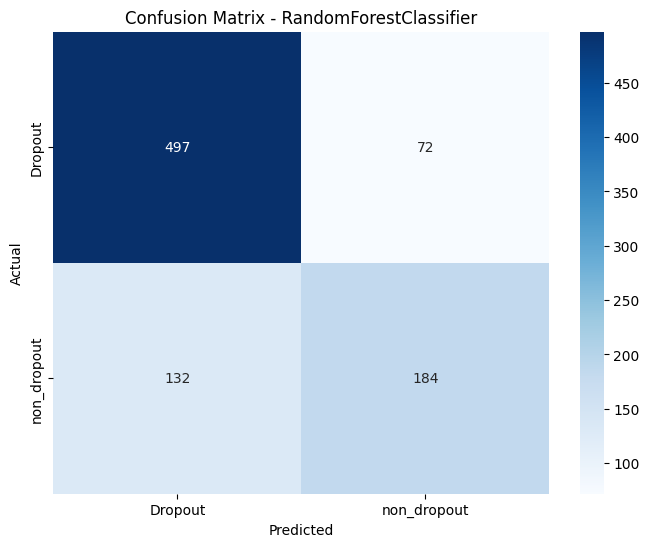

0.7951930977814298
0.784180790960452


In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Selected features based on correlation analysis
selected_features = ['sem1_credit', 'sem2_credit', 'sem1_approv', 'sem1_eval', 'prev_grade', 'mother_qual', 'sem2_noeval']

# Create the feature matrix X and target variable y
X = dropoutdf[selected_features].values  # X is a NumPy array - independent features
y = dropoutdf[target_column].values  # y is a NumPy array - dependent feature

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution in the resampled training set:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))


# Create and train the random forest model on the resampled data
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the random forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Function to plot confusion matrix using seaborn -- importing sklearn.metrics gave errors we couldn't fix
def plot_confusion_matrix_heatmap(model, X_test, y_test, class_labels):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot Confusion Matrix for Random Forest
plot_confusion_matrix_heatmap(random_forest, X_test, y_test, class_labels=['Dropout', 'non_dropout'])

print(logreg_model.score(X_train_resampled, y_train_resampled))

print(logreg_model.score(X_test, y_test))


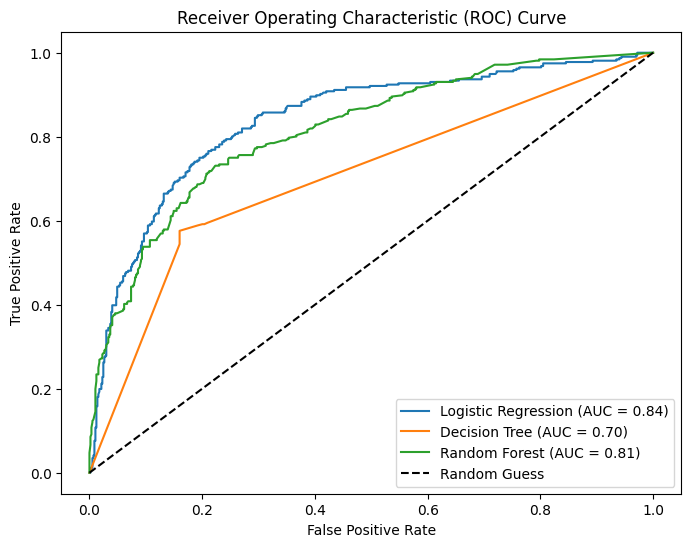

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# selected features based on correlation analysis
selected_features = ['sem1_credit', 'sem2_credit', 'sem1_approv', 'sem1_eval', 'prev_grade', 'mother_qual', 'sem2_noeval']

# Create the feature matrix X and target variable y
X = dropoutdf[selected_features].values  # X is a NumPy array - independent features
y = dropoutdf[target_column].values  # y is a NumPy array - dependent feature

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
logreg_model = LogisticRegression(max_iter=4000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

logreg_model.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Calculate ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])

roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
